# WeatherPy
---

## Setup
------------

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Use Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
------------

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated

In [15]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | mossel bay
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | margate
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | armagh
Processing Record 15 of Set 1 | swakopmund
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | qamdo
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | aioun
Pro

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,301.31,81,25,6.04,MH,1693844636
1,punta arenas,-53.1500,-70.9167,273.77,80,72,3.58,CL,1693844538
2,waitangi,-43.9535,-176.5597,280.83,65,100,0.99,NZ,1693844637
3,alice springs,-23.7000,133.8833,284.90,50,0,2.57,AU,1693844587
4,port-aux-francais,-49.3500,70.2167,276.26,80,100,13.69,TF,1693844638


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,301.31,81,25,6.04,MH,1693844636
1,punta arenas,-53.1500,-70.9167,273.77,80,72,3.58,CL,1693844538
2,waitangi,-43.9535,-176.5597,280.83,65,100,0.99,NZ,1693844637
3,alice springs,-23.7000,133.8833,284.90,50,0,2.57,AU,1693844587
4,port-aux-francais,-49.3500,70.2167,276.26,80,100,13.69,TF,1693844638


In [30]:
#Convert Max Temp to Celcius
city_data_df["Max Temp"] = (city_data_df["Max Temp"]-273.15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,28.16,81,25,6.04,MH,1693844636
1,punta arenas,-53.1500,-70.9167,0.62,80,72,3.58,CL,1693844538
2,waitangi,-43.9535,-176.5597,7.68,65,100,0.99,NZ,1693844637
3,alice springs,-23.7000,133.8833,11.75,50,0,2.57,AU,1693844587
4,port-aux-francais,-49.3500,70.2167,3.11,80,100,13.69,TF,1693844638


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

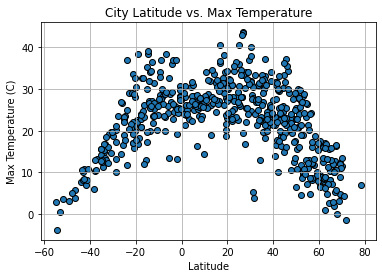

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Max Temperature")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

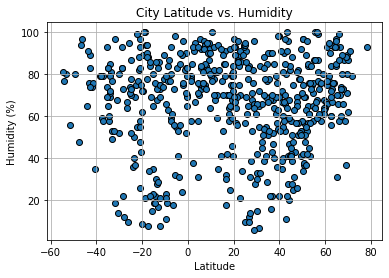

In [45]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Humidity")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

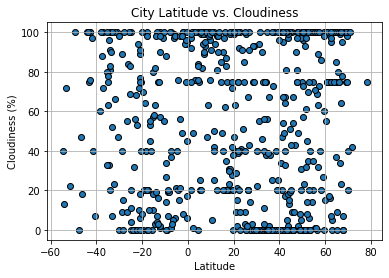

In [46]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Cloudiness")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

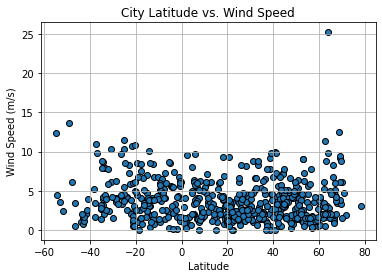

In [47]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Wind Speed")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

-------


### Create Nothern and Southern Hemisphere Dataframes

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,28.16,81,25,6.04,MH,1693844636
5,kodiak,57.7900,-152.4072,11.73,76,40,3.60,US,1693844639
9,iqaluit,63.7506,-68.5145,4.85,93,100,3.09,CA,1693844640
10,margate,51.3813,1.3862,24.06,69,100,3.13,GB,1693844641
11,lompoc,34.6391,-120.4579,23.21,85,100,5.36,US,1693844641


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,0.62,80,72,3.58,CL,1693844538
2,waitangi,-43.9535,-176.5597,7.68,65,100,0.99,NZ,1693844637
3,alice springs,-23.7000,133.8833,11.75,50,0,2.57,AU,1693844587
4,port-aux-francais,-49.3500,70.2167,3.11,80,100,13.69,TF,1693844638
6,edinburgh of the seven seas,-37.0676,-12.3116,13.22,79,72,9.84,SH,1693844639


###  Temperature vs. Latitude Linear Regression Plot

#### Northern Hemisphere

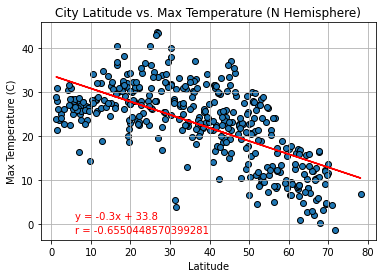

In [88]:
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Max Temperature (N Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (C)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,1),color="red")
plt.annotate(f'r = {rvalue}',(6,-2),color="r")

# Show plot
plt.show()

#### Southern Hemisphere

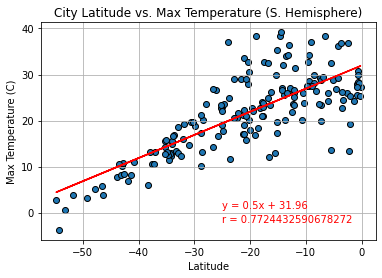

In [89]:
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Max Temperature (S. Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (C)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25, 1),color="red")
plt.annotate(f'r = {rvalue}',(-25,-2),color="r")

# Show plot
plt.show()

**Discussion about the linear relationship:** For both the Norther and Southern Hemispheres, as locations near the equator, maximum temperatures raise, with a moderate to strong corolation based on the r-values for both between latitude and temperature. This implies, as expected, that temperatures raise as you near the equator and that the two are related, not just random.

### Humidity vs. Latitude Linear Regression Plot

#### Northern Hemisphere

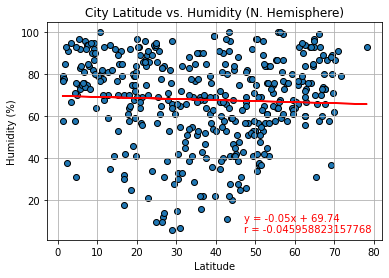

In [90]:
# Build scatter plot for latitude vs. humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Humidity (N. Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(47,10),color="red")
plt.annotate(f'r = {rvalue}',(47,5),color="r")

# Show plot
plt.show()

#### Southern Hemisphere

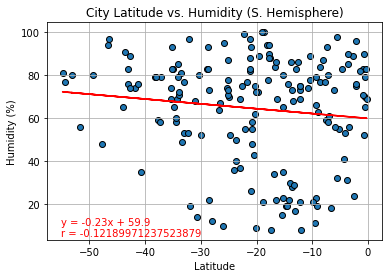

In [93]:
# Build scatter plot for latitude vs. humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Humidity (S. Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,10),color="red")
plt.annotate(f'r = {rvalue}',(-55,5),color="r")

# Show plot
plt.show()

**Discussion about the linear relationship:** For both the Norther and Southern Hemispheres, there is a weak or no corolation between latitude and humidity based on the r-values. This implies that humidity is not related to latitude strongly, and likely not at all.

### Cloudiness vs. Latitude Linear Regression Plot

#### Northern Hemisphere

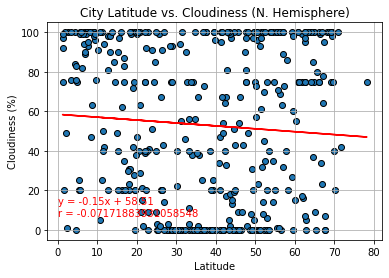

In [97]:
# Build scatter plot for latitude vs. cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Cloudiness (N. Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,13),color="red")
plt.annotate(f'r = {rvalue}',(0,7),color="r")

# Show plot
plt.show()

#### Southern Hemisphere

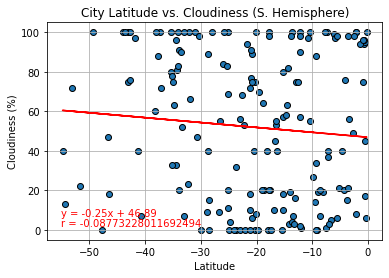

In [101]:
# Build scatter plot for latitude vs. cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Cloudiness (S. Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,7),color="red")
plt.annotate(f'r = {rvalue}',(-55,2),color="r")

# Show plot
plt.show()

**Discussion about the linear relationship:** For both the Norther and Southern Hemispheres, there is a weak or no corolation between latitude and cloudiness based on the r-values. This implies that cloudiness is not related to latitude strongly, and likely not at all.

### Wind Speed vs. Latitude Linear Regression Plot

#### Northern Hemisphere

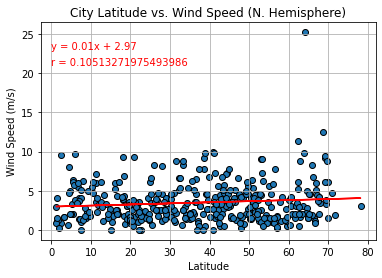

In [104]:
# Build scatter plot for latitude vs. wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Wind Speed (N. Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (m/s)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,23),color="red")
plt.annotate(f'r = {rvalue}',(0,21),color="r")

# Show plot
plt.show()

#### Southern Hemisphere

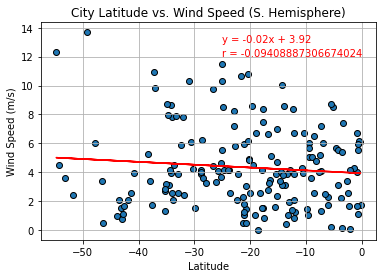

In [106]:
# Build scatter plot for latitude vs. wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.title ("City Latitude vs. Wind Speed (S. Hemisphere)")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (m/s)")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,13),color="red")
plt.annotate(f'r = {rvalue}',(-25,12),color="r")

# Show plot
plt.show()

**Discussion about the linear relationship:** For both the Norther and Southern Hemispheres, there is a weak or no corolation between latitude and wind speed based on the r-values. This implies that although wind speed does pick up slightly in both linear regressions the further away from the equator, wind speed is not related to latitude strongly, and likely not at all.